# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [32]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [33]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


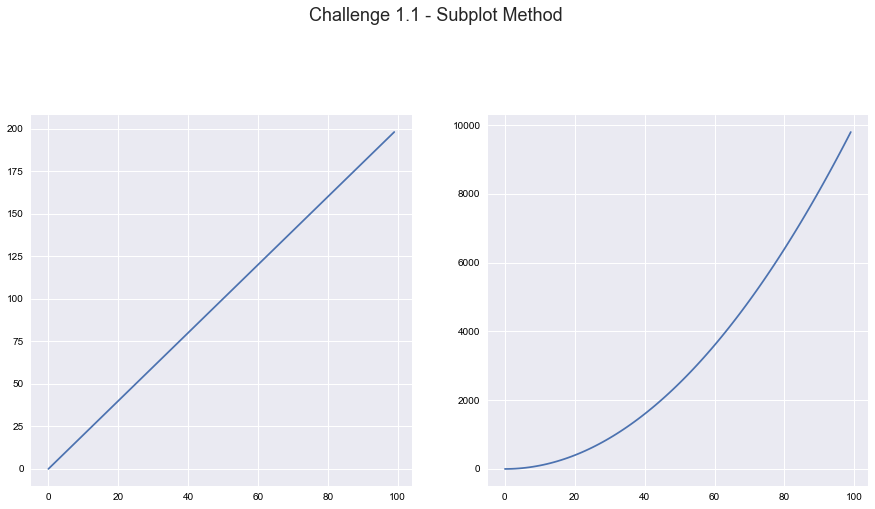

In [36]:

plt.figure(figsize = (15,15))

plt.style.use('fast')

plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')

plt.subplot(2,2,1)
plt.suptitle('Challenge 1.1 - Subplot Method', fontsize=18)

plt.plot(x,y, label='y = x*2')


plt.subplot(2,2,2)
plt.plot(x,z, label='z = x**2')


#plt.legend()

In [ ]:
# Method 1


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

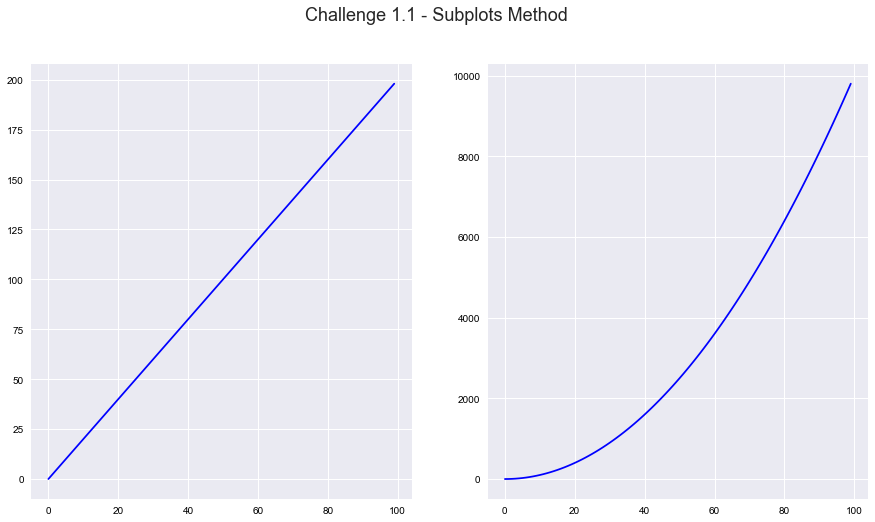

In [37]:

fig,axes = plt.subplots(1,2,figsize = (15,8)) 

fig.suptitle('Challenge 1.1 - Subplots Method', fontsize=18)

axes[0].plot(x,y, c='blue', label='y = x*2')

axes[1].plot(x,z, c='blue', label='y = x**2')


In [ ]:
# Method 2


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

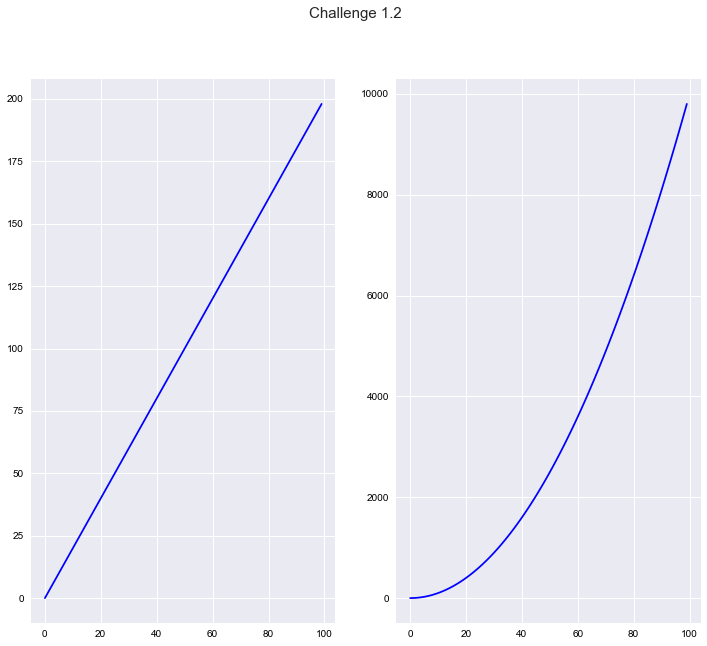

In [38]:

fig,axes = plt.subplots(1,2,figsize = (12,10)) 

fig.suptitle('Challenge 1.2', fontsize=15)

axes[0].plot(x,y, c='blue', label='y = x*2')

axes[1].plot(x,z, c='blue', label='y = x**2')


#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

#### As a bonus challenge, try to add a legend to the plot.

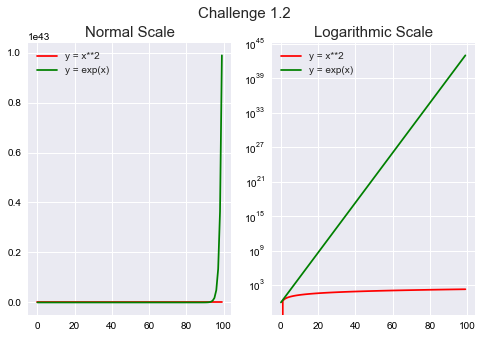

In [48]:
y2 = np.exp(x)


fig,axes = plt.subplots(1,2,figsize = (8,5)) 

fig.suptitle('Challenge 1.2', fontsize=15)


# First graph

axes[0].set_title('Normal Scale', fontsize=15)
axes[0].plot(x,y, c='red', label='y = x**2')
axes[0].plot(x,y2, c='green', label='y = exp(x)')

axes[0].legend()

# Second graph

axes[1].set_title('Logarithmic Scale', fontsize=15)
axes[1].plot(x,y, c='red', label='y = x**2')
axes[1].plot(x,y2, c='green', label='y = exp(x)')
axes[1].set_yscale('log')
axes[1].legend()

In [ ]:
# your code here



## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [11]:
fitbit = pd.read_csv(r"..\data\Fitbit2.csv")

#fitbit.info()

In [ ]:
# your code here
plt.style.use('classic')
sns.set_style('white')
!!!!!!!!!!!!


In [52]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [61]:
fitbit[['Months_encoded', 'Work_or_Weekend']]

ww = fitbit['Work_or_Weekend'].value_counts()
ww#.value_counts()#.sort_index()

183.5

([<matplotlib.axis.XTick at 0x1aeedf217f0>,
 [Text(0, 0, 'Weekend'), Text(1, 0, 'Work')])

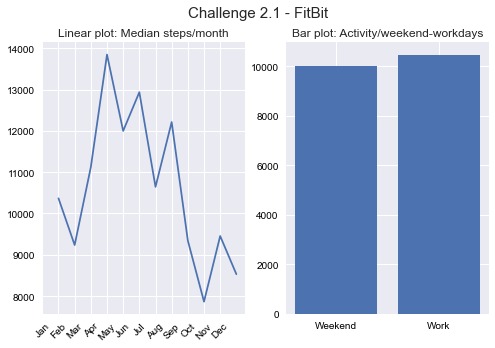

In [63]:
xaxis_months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

yaxis_1 = fitbit.groupby(["Months_encoded"])['Steps'].median()

yaxis_2 = fitbit.groupby(["Work_or_Weekend"])['Steps'].median()

fig,axes = plt.subplots(1,2,figsize = (8,5)) 

fig.suptitle('Challenge 2.1 - FitBit', fontsize=15)

# PUT NAME IN DIAGONAL NOT VERTICAL 

# First graph

axes[0].plot(yaxis_1.index, yaxis_1)
axes[0].set_title('Linear plot: Median steps/month', fontsize=12)

#axes[0].set_title('Normal Scale', fontsize=15)

plt.sca(axes[0])
plt.xticks(range(0, 12), xaxis_months, rotation=45)



# Second graph


axes[1].bar(yaxis_2.index, yaxis_2)
axes[1].set_title('Bar plot: Activity/weekend-workdays', fontsize=12)
plt.sca(axes[1])
plt.xticks(range(0, 2), ['Weekend', 'Work'])



#axes[1].legend()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [9]:
def create_a_scatter_plot(columns_x,columns_y):
    num_features_to_plot =len(columns_x)
    fig, ax = plt.subplots(1,num_features_to_plot,figsize = (15,5))
    fig.tight_layout(pad=4.0)
    for n in range(num_features_to_plot):
        x = columns_x[n]
        y = columns_y[n]
        ax[n].scatter(x,y)
        ax[n].set_title(x.name + " vs "+ y.name,fontsize=10,fontweight='semibold')
        ax[n].set_xlabel(x.name)
        ax[n].set_ylabel(y.name)
    return plt.show()



In [12]:
columns_to_plot_x = [fitbit["Minutes Lightly Active"],fitbit["Minutes Very Active"],fitbit["Minutes Sedentary"]]
columns_to_plot_y = [fitbit["Steps"],fitbit["Steps"],fitbit["Steps"]]


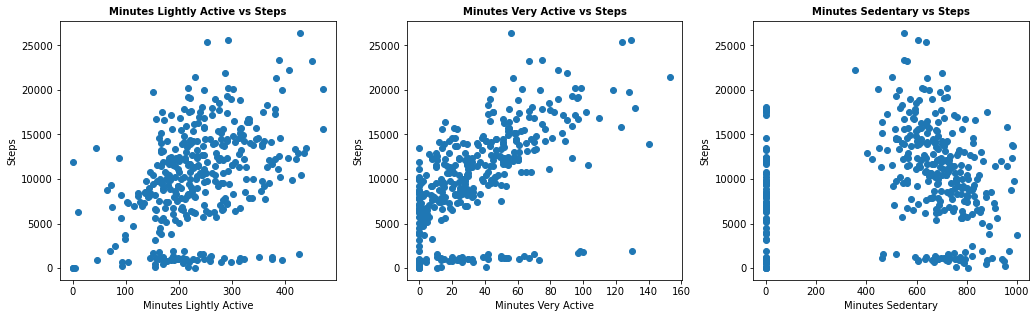

In [13]:

create_a_scatter_plot(columns_to_plot_x,columns_to_plot_y )

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [3]:
# your code here
titanic = pd.read_csv(r"..\data\titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [4]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
# NUMERICAL VARIABLES
titanic.dtypes
titanic.select_dtypes(include=['float64','int64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [8]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=["object"])


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [21]:
plt.style.context('classic')

#### Use the right visulalization to show the distribution of column `Age`.

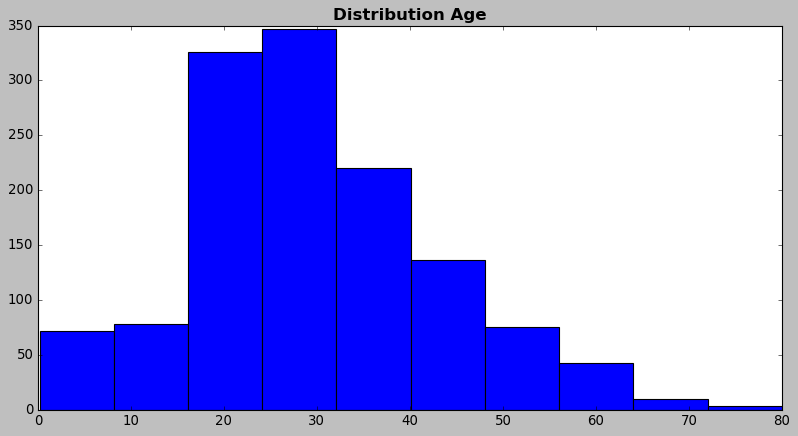

In [24]:
with plt.style.context('classic'):
    fig, ax = plt.subplots(1,1,figsize = (12,6))
    ax.hist(titanic["Age"],bins=10)
    ax.set_title("Distribution Age", fontsize=15,fontweight='semibold')
    plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

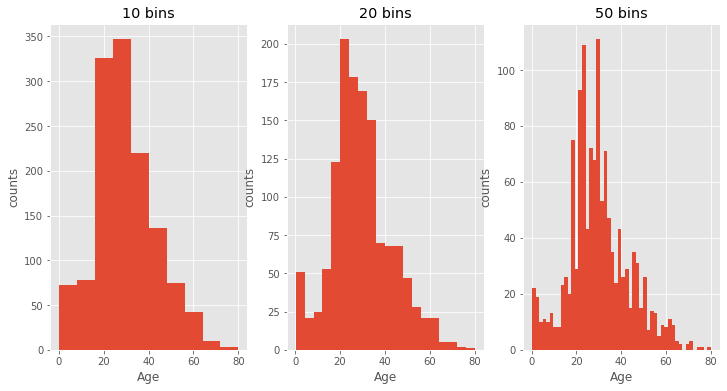

In [25]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1,3,figsize = (12,6))
    for a in ax:
        a.set_xlabel("Age")
        a.set_ylabel("counts")
    ax[0].hist(titanic["Age"],bins=10)
    ax[0].set_title('10 bins')
    ax[1].hist(titanic["Age"],bins=20)
    ax[1].set_title('20 bins')
    ax[2].hist(titanic["Age"],bins=50)
    ax[2].set_title('50 bins')
    plt.show()


#### How does the bin size affect your plot?

Distribution gets skewed to the right when we change the number of bins


#### Use seaborn to show the distribution of column `Age`.

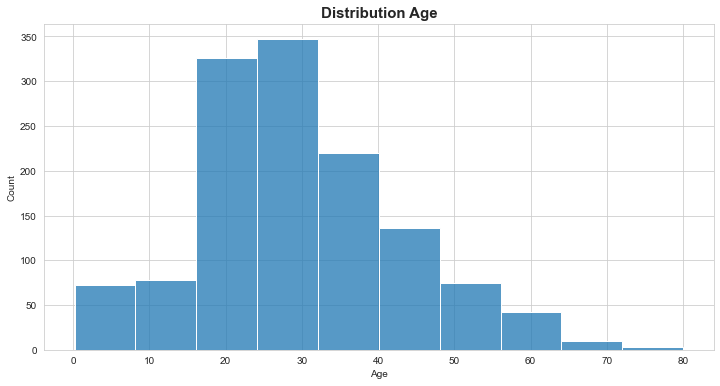

In [26]:

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,1,figsize = (12,6))
sns.histplot(titanic["Age"],bins=10)
ax.set_title("Distribution Age", fontsize=15,fontweight='semibold')
plt.show()


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

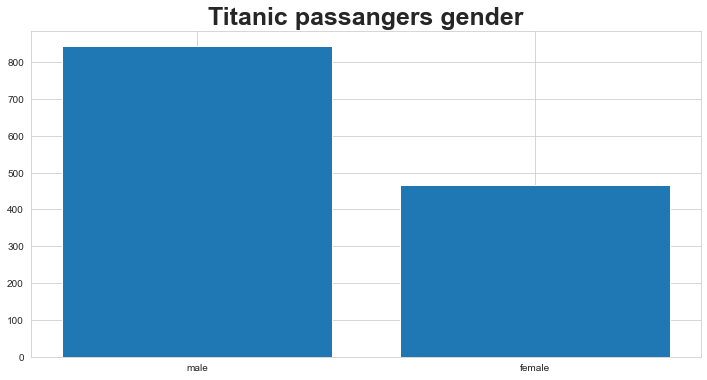

In [33]:
# Method 1 - matplotlib


plot_gender = titanic["Gender"].value_counts()


fig, ax = plt.subplots(1,1,figsize = (12,6))
ax.bar(plot_gender.index,plot_gender)
ax.set_title('Titanic passangers gender', size='25', fontweight='bold')
plt.show()


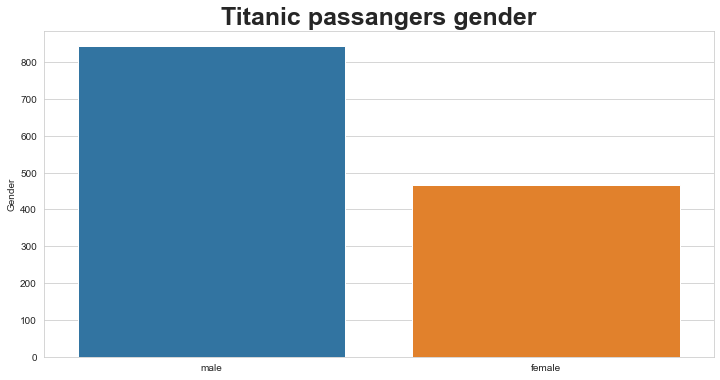

In [34]:
# Method 2 - seaborn

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = plot_gender.index, y =plot_gender)
ax.set_title('Titanic passangers gender', size='25', fontweight='bold')



plt.show()

#### Use the right plot to visualize the column `Pclass`.

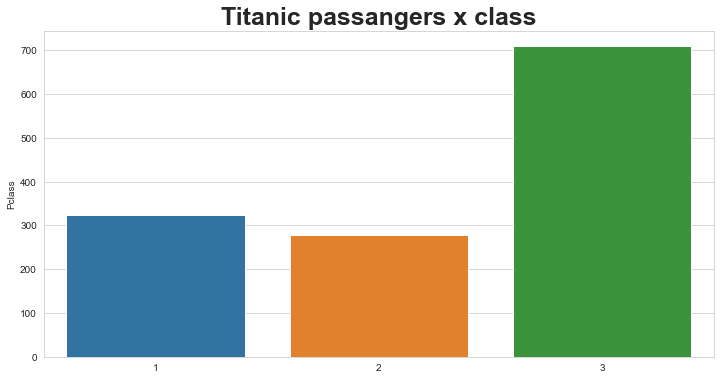

In [46]:
plot_class = titanic["Pclass"].value_counts()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = plot_class.index, y =plot_class)
ax.set_title('Titanic passangers x class', size='25', fontweight='bold')


plt.show()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

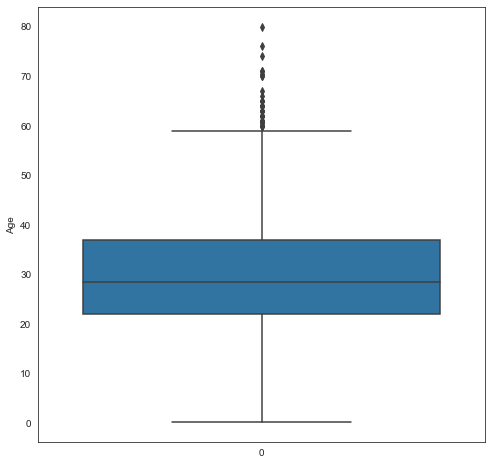

In [49]:

sns.set_style('white')
fig,ax = plt.subplots(figsize = (8,8))
sns.boxplot(data=titanic["Age"])
ax.set_ylabel("Age")


plt.show()



#### What does the last plot tell you about the feature `Age`?

* The median age is around 30. <br>
<br>
* Passengers over 60 are outliers<br>
<br>
* Most passengers are in the range between 20 years old and 40, approximately, marked with end of the box.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

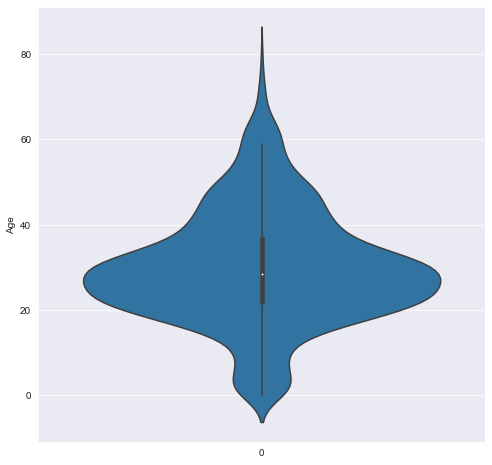

In [51]:

sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (8,8))
sns.violinplot(data=titanic["Age"])
ax.set_ylabel("Age")
plt.show()

#### What additional information does the last plot provide about feature `Age`?

As in the box plot, we can see the distribution of the data, specially the most common ages


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

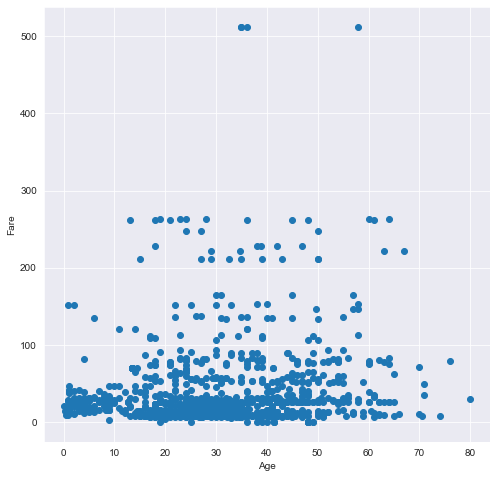

In [55]:

# Method 1 - matplotlib

fig, ax = plt.subplots(1,1,figsize = (8,8))
ax.scatter(x = titanic["Age"], y = titanic["Fare"] )
ax.set_ylabel("Fare")
ax.set_xlabel("Age");


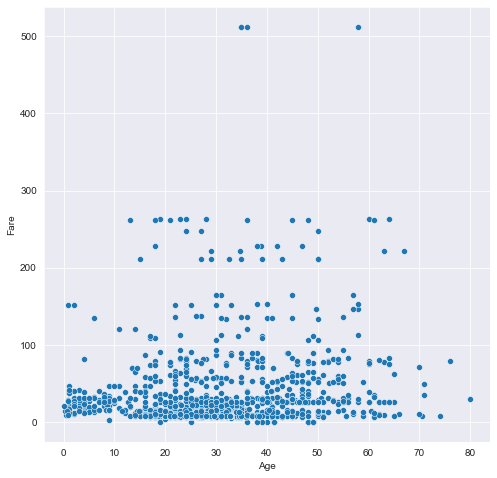

In [56]:
# Method 2 - seaborn 
fig, ax = plt.subplots(1,1,figsize = (8,8))
sns.scatterplot(x = titanic["Age"], y = titanic["Fare"] )
plt.show()

#### Plot the correlation matrix using seaborn.

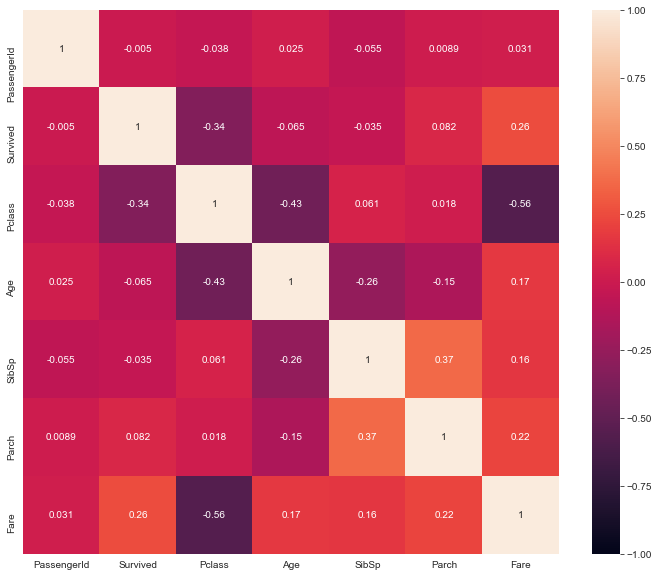

In [59]:
plt.figure(figsize=(12, 10))
heatmap =sns.heatmap(titanic.corr(),vmin=-1,vmax=1, annot=True)

#### What are the most correlated features?

Passenger class & Fare

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

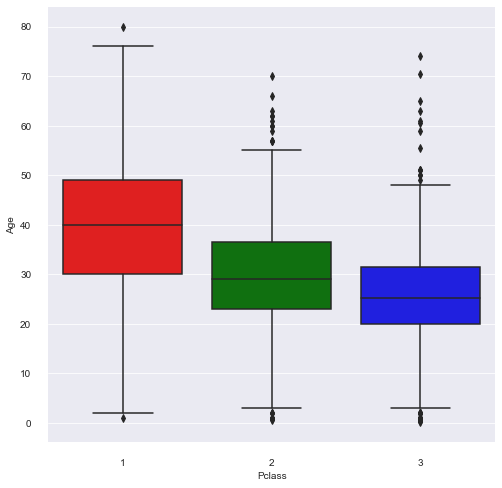

In [61]:
fig, ax = plt.subplots(1,1,figsize = (8,8))

sns.boxplot(x="Pclass", y="Age", palette=["r", "g","b"],data=titanic)
sns.despine(offset=10, trim=True)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

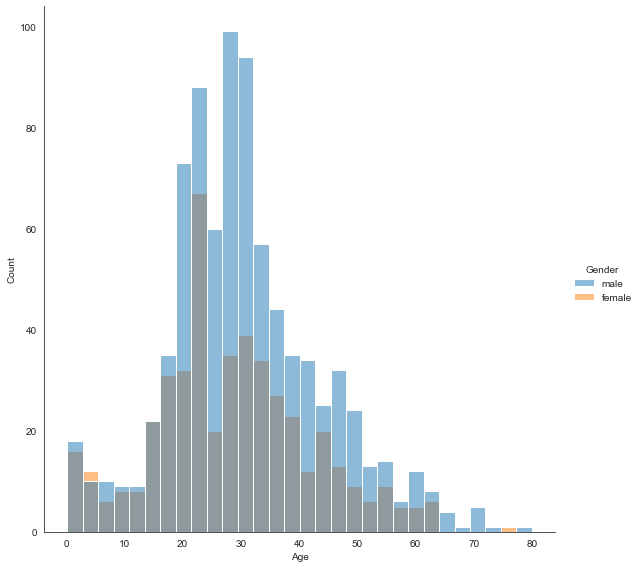

In [65]:

sns.displot(data=titanic, x="Age", hue="Gender",height=8)
plt.show()